# National Parks Service Biodiversity Portfolio Project
Codecademy Portfolio Project by Leah Fulmer ([Github](https://github.com/leahmfulmer))<br>
With gratitude to Jean Lawlis ([GitHub](https://github.com/JHLinMaine)) and Ian Wood ([GitHub](https://github.com/pineapple-bois))

#### Project Objectives:

* Interpret data about plant and animal observations by the National Park Service.
* Demonstrate profiency in data wrangling, analysis, and communication.
* Give recommendations through [Google Slides presentation](https://docs.google.com/presentation/d/12Oe1TFlzyTFNkMDYnkl5vthL3dwCx-ATYFMRU4YalM8/edit?usp=sharing).

#### Table of Contents :
[Section 1: Loading and Examining the Data](#data)<br>
[Section 2: Wrangling and Tidying the Data](#tidy)<br>
[Section 3: Questions for Analysis](#questions)<br>
[Section 4: Data Distributions](#distributions)<br>
[Section 5: Conservation Analysis](#conservation)<br>
[Section 6: Conclusions](#conclusions)<br>

### Section 1: Loading and Examining the Data <a id="data"></a>

In [2]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data

observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

In [4]:
# Examine observations

print("The dataset 'observations' contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

observations.head()
# observations.count()

The dataset 'observations' contains 23296 rows and 3 columns.


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# Examine species_info

print("The dataset 'species_info' contains {} rows and \
{} columns.".format(species_info.shape[0], species_info.shape[1]))

species_info.head()
# species_info.count()

The dataset 'species_info' contains 5824 rows and 4 columns.


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Section 2: Wrangling and Tidying the Data<a id="tidy"></a>

#### All Datasets

In [6]:
# Make all rows with strings lower case

def make_lower_case(df):
    for column in df.columns:
        if type(df[column][0]) != np.int64:
            df[column] = df[column].apply(lambda x: x.lower() if type(x) != float else x)

make_lower_case(observations)
make_lower_case(species_info)

#### Observations

In [7]:
# Drop completely-duplicated rows

observations.drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], inplace=True)
print("The dataset 'observations' now contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

The dataset 'observations' now contains 23281 rows and 3 columns.


In [31]:
# Sum observational instances for rows with duplicated scientific_name and park_name 

observations = observations.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()
print("The dataset 'observations' now contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

observations.head()

The dataset 'observations' now contains 22164 rows and 3 columns.


,scientific_name,park_name,observations
0,abies bifolia,bryce national park,109
1,abies bifolia,great smoky mountains national park,72
2,abies bifolia,yellowstone national park,215
3,abies bifolia,yosemite national park,136
4,abies concolor,bryce national park,83


#### Species_info

In [9]:
# Count how many rows we expect in our tidy species_info dataset

duplicates = species_info[species_info.duplicated(subset=['scientific_name'])]
print("There are {} rows with the same scientific_name in 'species_info'."\
      .format(duplicates.shape[0]))
print("Therefore, we expect our tidy 'species_info' dataset to contain {} rows."\
      .format(species_info.shape[0] - duplicates.shape[0]))

There are 283 rows with the same scientific_name in 'species_info'.
Therefore, we expect our tidy 'species_info' dataset to contain 5541 rows.


In [10]:
# Replace NaN values with "no data"

species_info.conservation_status = species_info.conservation_status.fillna("no data")

In [11]:
# Join common_names and conservation_status for duplicated scientific_name

species_info = species_info.groupby('scientific_name', as_index=False)\
.agg({'common_names': lambda x: ', '.join(x), 'category': 'first', \
      'conservation_status': 'last'})

print("The dataset 'species_info' now contains {} rows and \
{} columns.".format(species_info.shape[0], species_info.shape[1]))
species_info.head()

The dataset 'species_info' now contains 5541 rows and 4 columns.


,scientific_name,common_names,category,conservation_status
0,abies bifolia,rocky mountain alpine fir,vascular plant,no data
1,abies concolor,"balsam fir, colorado fir, concolor fir, silver...",vascular plant,no data
2,abies fraseri,fraser fir,vascular plant,species of concern
3,abietinella abietina,abietinella moss,nonvascular plant,no data
4,abronia ammophila,"wyoming sand verbena, yellowstone sand verbena",vascular plant,species of concern


#### Merge

In [12]:
# Combine 'observations' and 'species_info'

combined = pd.merge(observations, species_info, on = ['scientific_name'], how = 'left')

print("The dataset 'combined' contains {} rows and \
{} columns.".format(combined.shape[0], combined.shape[1]))
combined.head()

The dataset 'combined' contains 22164 rows and 6 columns.


,scientific_name,park_name,observations,common_names,category,conservation_status
0,abies bifolia,bryce national park,109,rocky mountain alpine fir,vascular plant,no data
1,abies bifolia,great smoky mountains national park,72,rocky mountain alpine fir,vascular plant,no data
2,abies bifolia,yellowstone national park,215,rocky mountain alpine fir,vascular plant,no data
3,abies bifolia,yosemite national park,136,rocky mountain alpine fir,vascular plant,no data
4,abies concolor,bryce national park,83,"balsam fir, colorado fir, concolor fir, silver...",vascular plant,no data


#### Separate by National Park

In [13]:
# Create unique dataframes for each National Park

def isolate(park_name):
    df = combined[combined.park_name == park_name]
    return df

bryce = isolate("bryce national park")
great_smoky = isolate("great smoky mountains national park")
yellowstone = isolate("yellowstone national park")
yosemite = isolate("yosemite national park")

### Section 3: Questions for Analysis<a id="questions"></a>

**Data Distributions:**
* Which National Parks make the most observations? Which categories of species do they observe?
* How many species are represented in each category? How does this compare to number of observations?

**Conservation Analysis:**
* Which conservation status is most populated? Which species categories does it contain?
* Which categories have the highest percentages of species flagged for conservation?

### Section 4: Data Distributions<a id="distributions"></a>

#### Which National Parks make the most observations? Which categories of species do they observe?

In [22]:
# Group observations by National Park
parks_grouped = combined.groupby(["park_name", "category"]).observations.sum().reset_index()

# Isolate species flagged for conservation
conserve = combined[combined.conservation_status != "no data"]
parks_grouped_conserve = conserve.groupby(["park_name", "category"]).observations.sum().reset_index()

# Pivot by species category
pivot_category = parks_grouped.pivot(columns='category', \
                              index='park_name', values='observations').reset_index()
column_order = ['park_name', 'vascular plant', 'bird', 'nonvascular plant', 'mammal', \
                'fish', 'amphibian', 'reptile']
row_order = ['yellowstone national park', 'yosemite national park', 'bryce national park', \
             'great smoky mountains national park']
pivot_category = pivot_category.reindex(column_order, axis=1).reindex([2,3,0,1])

# Again for conserved species
pivot_category_conserve = parks_grouped_conserve.pivot(columns='category', \
                              index='park_name', values='observations').reset_index()
pivot_category_conserve = pivot_category_conserve.reindex(column_order, axis=1).reindex([2,3,0,1])

# Create a color dictionary
palette = sns.color_palette("gist_earth", len(column_order))
# palette.reverse()
colors = dict(zip(column_order, palette))

# parks_grouped.head()
# pivot_category.head()
# pivot_category_conserve.head()

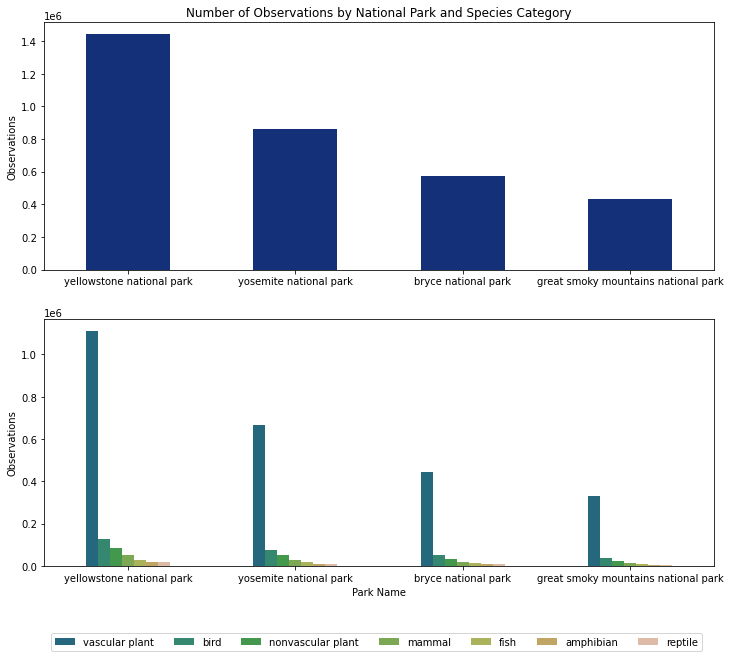

In [44]:
# Plot Number of Observations by National Park and Species Category

fig, axes = plt.subplots(figsize=(12,10), nrows=2, ncols=1)

# Observations sum
df = parks_grouped.groupby('park_name').observations.sum().reset_index()\
        .sort_values('observations', ascending=False)
ax = df.plot(ax=axes[0], \
        kind='bar', rot=0, title="Number of Observations by National Park and Species Category", \
        xlabel='', ylabel="Observations", legend=False, color=colors['park_name'])
ax.set_xticklabels(df.park_name)

# Observations by category
pivot_category.plot(ax=axes[1], x='park_name', kind='bar', \
                    rot=0, xlabel="Park Name", ylabel="Observations", color=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.99, -0.25))

plt.savefig("images/num_obs_by_park_and_category_vascular")
plt.show()

**Analysis:**

Yellowstone National Park makes the most observations. Among every park, vascular plants are by far the most observed category, making other categories difficult to see. Let's drop vascular plants from our dataset and take a closer look at the distribution of observations in the other categories.

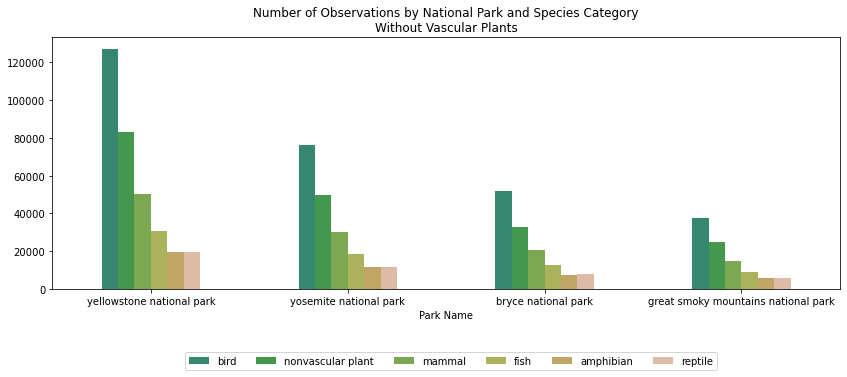

In [61]:
# Plot Number of Observations by National Park and Species Category Without Vascular Plants

pivot_category.drop(['vascular plant'], axis=1).plot(x='park_name', kind='bar', rot=0, \
        title="Number of Observations by National Park and Species Category\nWithout Vascular Plants", \
        xlabel='Park Name', figsize=(12,5.5), color=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.85, -0.23))
plt.tight_layout()

plt.savefig("images/num_obs_by_park_and_category_no_vascular")
plt.show()

The uniformity of these distributions is highly suspicious. Let us isolate the species flagged for conservation.

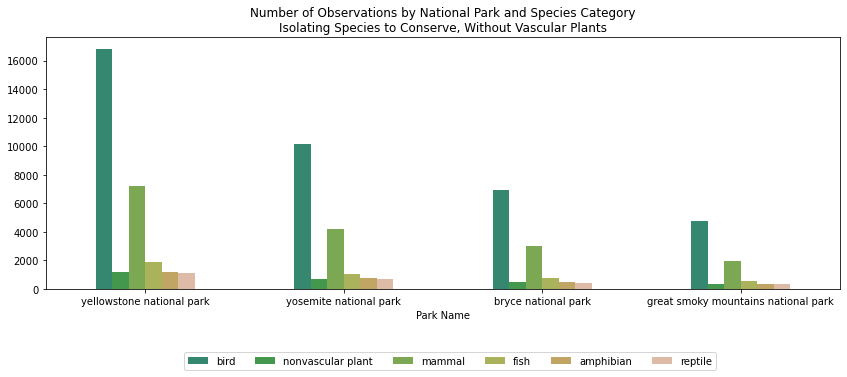

In [64]:
# Plot Number of Conservation Observations by National Park and Species Category Without Vascular Plants

pivot_category_conserve.drop(['vascular plant'], axis=1).plot(x='park_name', kind='bar', rot=0, \
        title="Number of Observations by National Park and Species Category\nIsolating Species to Conserve, Without Vascular Plants", \
        xlabel='Park Name', figsize=(12,5.5), color=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.85, -0.23))
plt.tight_layout()

plt.savefig("images/num_obs_by_park_and_category_no_vascular_conserve")
plt.show()

This data is unbelievable. **See analysis below.**

#### How many species are represented in each category? How does this compare to observational proportions?

In [16]:
# Group data by species and observations per category

def group_proportions(df):
    df_g = df.groupby('category', as_index=False)\
        .agg({'scientific_name': 'count', 'observations': 'sum'})\
        .sort_values('scientific_name', ascending=False)
    df_g['scientific_name_proportions'] = df_g['scientific_name']\
        .map(lambda a: np.round(a / df_g.scientific_name.max(), 2))
    df_g['observations_proportions'] = df_g['observations']\
        .map(lambda a: np.round(a / df_g.observations.max(), 2))
    return df_g

bryce_g = group_proportions(bryce)
great_smoky_g = group_proportions(great_smoky)
yellowstone_g = group_proportions(yellowstone)
yosemite_g = group_proportions(yosemite)
yosemite_g

,category,scientific_name,observations,scientific_name_proportions,observations_proportions
6,vascular plant,4262,664965,1.00,1.00
1,bird,488,76207,0.11,0.11
4,nonvascular plant,333,49783,0.08,0.07
3,mammal,176,30339,0.04,0.05
2,fish,125,18615,0.03,0.03
0,amphibian,79,11444,0.02,0.02
5,reptile,78,11483,0.02,0.02


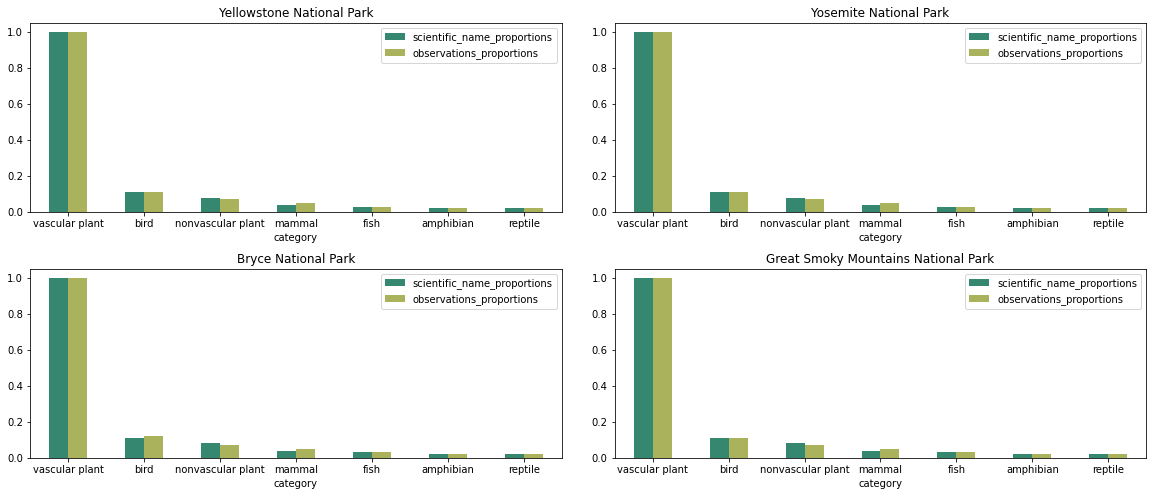

In [17]:
# Plot categories by proportions of species and compare to observational proportions

# Dataframes, titles, and rows for each park
dfs = [yellowstone_g, yosemite_g, bryce_g, great_smoky_g]
titles = ['yellowstone national park', 'yosemite national park', 'bryce national park', 'great smoky mountains national park']
rows = [0,0,1,1]

# Colors
proportions_column_order=['scientific_name_proportions', 'observations_proportions']
palette = sns.color_palette("gist_earth", len(proportions_column_order))
proportions_colors = dict(zip(proportions_column_order, palette))

# Plot
fig, axes = plt.subplots(figsize=(20,8), nrows=2, ncols=2)

for i in range(4):
    dfs[i].plot(ax = axes[rows[i],i%2], x='category', \
    y=['scientific_name_proportions', 'observations_proportions'], \
    kind='bar', rot=0, title=titles[i].title(), color=proportions_colors)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

**Analysis:**<br>

The distribution of observations among every park takes a surprisingly similar shape. Vascular plants are most observed, followed by birds, nonvascular plants, mammals, fish, and ending with amphibians and reptiles nearly tied for least number of observations. This pattern may illuminate how the data was taken. Finding this pattern far too neat (and remembering that Codecademy does not cite its data source), my first impression was that the data is simulated. However, although the proportions of observations look similar in the above visualization, their exact values are all slightly off from exactly proportionate. Perhaps this pattern speaks to the observational accessibility of varying categories or an observational quota required by the investigators. <br>

Isolating for species flagged for conservation, we find this same uniformity. Unfortunately, this means that we cannot make meaningful conclusions about which parks contain the highest percentages of species flagged for conservation. Neither can we make meaningful comparisons between the different ecosystems within each park. According to the data, each park contains nearly the same proportions of species flagged for conservation and nearly the same distribution of both species and observations categorically. This is further evidence that the data is simulated. <br>

Perhaps the data was simulated by Codecademy to achieve all of the specific data-cleaning challenges found in [Section 2: Wrangling and Tidying the Data](#tidy).

### Section 5: Conservation Analysis<a id="conservation"></a>

#### Which conservation status is most populated? Which categories does it contain?

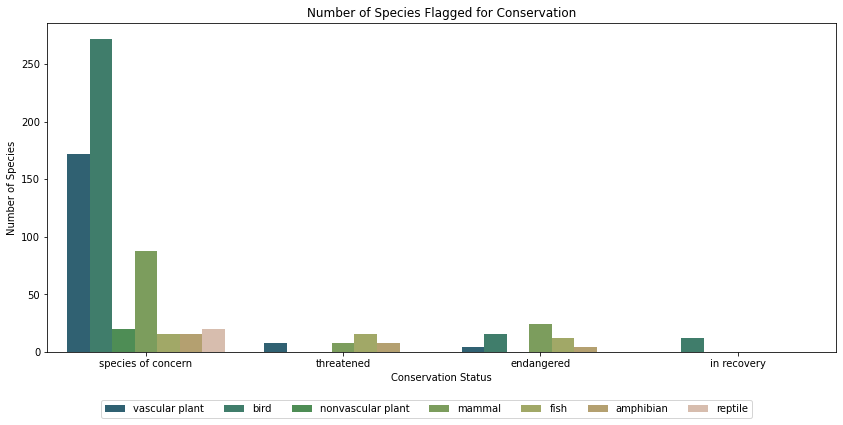

In [94]:
# Isolate species flagged for conservation
conserve = combined[combined.conservation_status != "no data"]

# Plot Number of Species Flagged for Conservation
plt.figure(figsize=(12,6))
sns.countplot(data=conserve, x='conservation_status', hue='category', hue_order=column_order[1:], palette=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.9, -0.13))
plt.title("Number of Species Flagged for Conservation")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.tight_layout()

plt.savefig("images/num_species_flagged_for_conservation")
plt.show()

**Analysis:**

The large majority of species flagged for conservation are classified as species of concern, rather than threatened, endangered, or in recovery. Among species of concern, birds have the widest variety of species flagged for conservation, followed by vasular plants and mammals. After species of concern, the other three conservation types are sparsely populated. No birds, nonvascular plants, nor reptiles are threated. No nonvascular plants nor reptiles are endangered. Only birds are represented among species in recovery. <br>

Although vascular plants dominate the dataset with respect to number of species and number observations, they do not represented the highest category of species flagged for conservation. Conversely, birds represent far fewer species and observations given the dataset as a whole, but are of great concern when it comes to conservation. I am thus curious to examine what proportion of each category is flagged for conservation.

#### Which categories have the highest proportions of species flagged for conservation?

In [19]:
# Silence warnings
pd.options.mode.chained_assignment = None

# Group by category and count species by conservation status 
conservation_values = combined.groupby("category")\
    .conservation_status.value_counts()\
    .rename_axis(['category', 'conservation_status'])\
    .reset_index(name='counts')

# conservation_values

In [20]:
# Pivot
pivot_conservation_values = conservation_values.pivot(columns='category', \
                              index='conservation_status', values='counts').reset_index()
pivot_conservation_values = pivot_conservation_values.fillna('0')

# Reorder columns
column_order = ['conservation_status', 'vascular plant', 'bird', 'nonvascular plant', 'mammal', \
                'fish', 'amphibian', 'reptile']
pivot_conservation_values = pivot_conservation_values.reindex(column_order, axis=1).reindex([2,3,4,0,1])

# Change dtypes
pivot_conservation_values = pivot_conservation_values.astype({'amphibian': 'int64', 'bird': 'int64', \
                                'fish': 'int64', 'mammal': 'int64', 'nonvascular plant': 'int64', \
                                'reptile': 'int64', 'vascular plant': 'int64'})
pivot_conservation_values

category,conservation_status,vascular plant,bird,nonvascular plant,mammal,fish,amphibian,reptile
2,no data,16864,1652,1312,584,456,288,292
3,species of concern,172,272,20,88,16,16,20
4,threatened,8,0,0,8,16,8,0
0,endangered,4,16,0,24,12,4,0
1,in recovery,0,12,0,0,0,0,0


In [21]:
# Convert values to proportions
df = pivot_conservation_values
numeric_columns = [col for col in df.columns if df[col].dtypes == 'int64']

for i in numeric_columns:
    df[i] = np.round(df[i] / df[i].sum(), 2)

# Examine dataframe
pivot_conservation_proportions = df
pivot_conservation_proportions

category,conservation_status,vascular plant,bird,nonvascular plant,mammal,fish,amphibian,reptile
2,no data,0.99,0.85,0.98,0.83,0.91,0.91,0.94
3,species of concern,0.01,0.14,0.02,0.12,0.03,0.05,0.06
4,threatened,0.00,0.00,0.00,0.01,0.03,0.03,0.00
0,endangered,0.00,0.01,0.00,0.03,0.02,0.01,0.00
1,in recovery,0.00,0.01,0.00,0.00,0.00,0.00,0.00


**Analysis:**

Birds and mammals have the highest proportions of species of concern, both categories containing about 13% species of concern. Because the total number of species differs from one category to another, this level of detail is unavailable within the bar plot of Number of Species Flagged for Conservation. Similarly, although vascular plants have the second-highest number of species of concern, these species only represent 1% of all the vascular plant species available. Mammals have both the highest number and the highest percentage of endangered species within our dataset.

### Section 6: Conclusions<a id="conclusions"></a>

* This project was **an excellent exercise in data wrangling and tidying**. I enjoyed the process of cleaning the data because I was reminded what a joy it can be to transform a dataset into a legible text. Tidying data is so often an enjoyable puzzle to solve, including with this data.<br><br>
* Unfortunately, **the data are too unrealistic to make meaningful conclusions** about the ecosystems described therein. Within each national park, there are nearly identical distributions of species and observations across the given categories, differentiated only by the total number of observations for each park. We receive no authentic information about which ecosystems may be (dis)advantageous to endangered or conserved species, and thus no real understanding of how to support the balance of their habitats. There's no meaningful path forward. <br><br>
* The analyses of **species flagged for conservation reveal more realistic diversity**, and may reflect more authentic data on the matter. Here, we discover that birds and mammals as a whole are in most desperate need of conservation because high proportions of their species are flagged for conservation. Mammals in particular have the highest proportion of endangered species.